In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import splitwavepy as sw
from math import fabs, sin, cos
import math

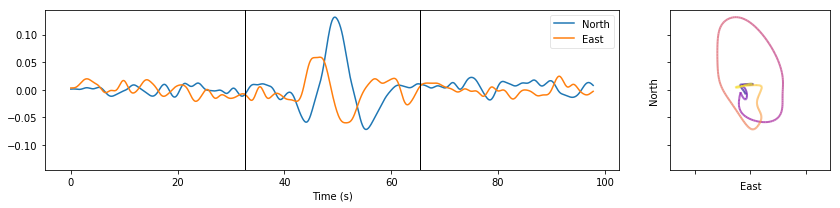

In [62]:
a = sw.Data(delta=0.1, noise=0.05, split=(60,2.3))
b = sw.Data(delta=0.1, noise=0.05, split=(60,2.3))
a.plot()


In [63]:
A = a.Q()
B = b.Q()

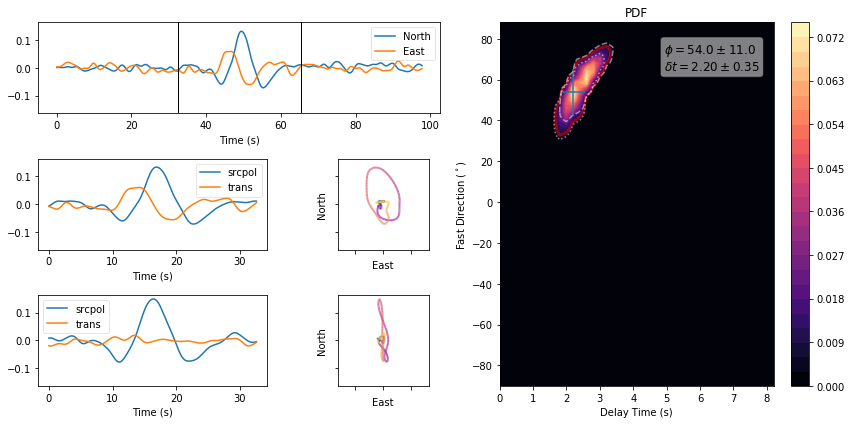

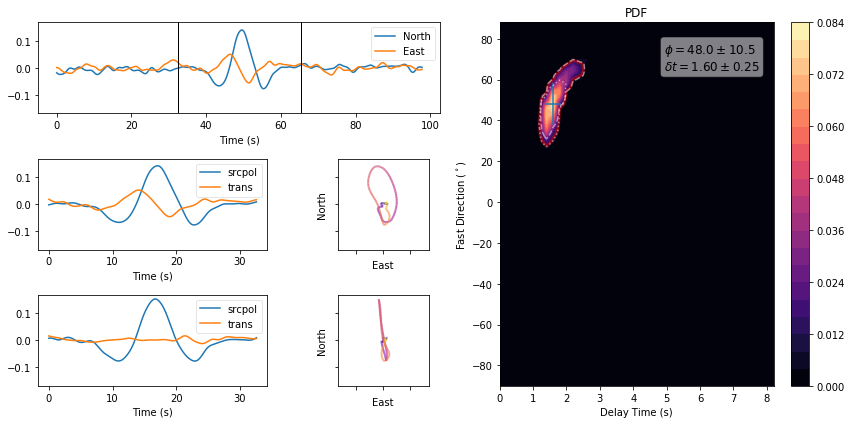

In [64]:
A.plot()
B.plot()


In [65]:
np.sum(B.pdf - A.pdf)

-4.5922013634489972e-26

In [66]:
from scipy import signal
corr = signal.correlate2d(A.pdf, A.pdf, 'valid')

def normcorr(a, b):
    norma = (a - np.mean(a))/np.std(a)
    normb = (b - np.mean(b))/np.std(b)
    corr = signal.correlate2d(norma, normb, 'valid')
    return abs(float(corr / a.size))
    

In [67]:
normcorr(A.pdf, B.pdf)

0.00939173081976797

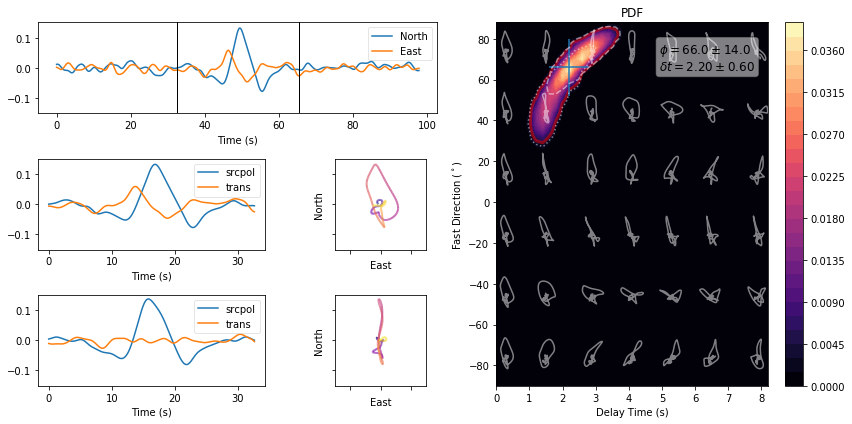

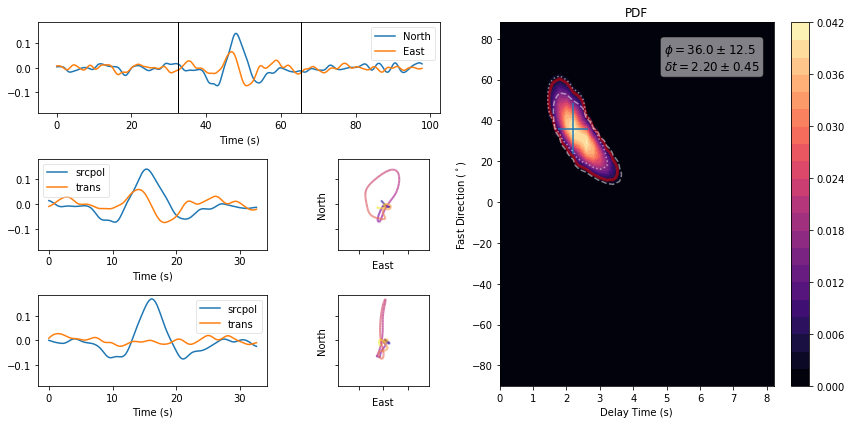

0.09099548320700585

In [152]:
a = sw.Data(delta=0.1, noise=0.06, split=(60, 2.3)).Q()
b = sw.Data(delta=0.1, noise=0.06, split=(30, 2.3)).Q()
a.plot(ppm=True)
b.plot()
normcorr(a.pdf, b.pdf)

In [111]:
def area_between(a, b):
    "judge how similar the surface are by finding the volume under both surfaces"
    return np.sum(np.minimum(a, b))
    

In [112]:
def dist(phi1, dt1, phi2, dt2):
    phi1, phi2 = math.radians(phi1), math.radians(phi2)
    x1, y1 = dt1 * cos(phi1), dt1 * sin(phi1)
    x2, y2 = dt2 * cos(phi2), dt2 * sin(phi2)
    dist1 = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    dist2 = math.sqrt((x2+x1)**2 + (y2+y1)**2)
    return min(dist1, dist2)
    

In [113]:
dist(0,1,90,.1)

1.004987562112089

In [114]:
area_between(b.pdf/2, a.pdf/2)

0.20402740315864459

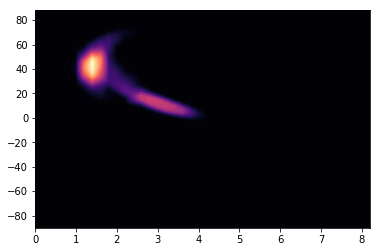

In [115]:
# plt.contourf(*a._grid(), np.minimum(a.pdf, b.pdf), alpha=0.5)
plt.contourf(*a._grid(), (a.pdf+b.pdf)/2, 50, cmap='magma')
plt.show()

In [120]:
dl = a.lags[1] - a.lags[0]

In [126]:
dd = a.degs[1] - a.degs[0]
pi = math.pi

In [133]:
for ii in range(10):
    a = (ii+1 * dl)**2 - (ii * dl)**2
    print(a)
    


0.04
1.4
4.68
9.88
17.0
26.04
37.0
49.88
64.68
81.4


In [143]:
C = map(lambda x: (x+1)**2 - x**2, range(a.lags.size))


In [135]:
a.pdf

array([[  2.11806383e-61,   2.11806383e-61,   2.11806383e-61, ...,
          2.11806383e-61,   2.11806383e-61,   2.11806383e-61],
       [  6.75647166e-64,   2.51800827e-64,   9.80088382e-65, ...,
          1.62473801e-62,   5.45151315e-63,   1.88581159e-63],
       [  1.32553533e-65,   1.95968406e-66,   3.19192683e-67, ...,
          6.89443389e-63,   7.91682852e-64,   9.82034370e-65],
       ..., 
       [  2.70884610e-64,   1.48774723e-66,   9.29267295e-69, ...,
          1.55065758e-57,   9.66665434e-60,   5.21163555e-62],
       [  5.87316130e-63,   2.20852749e-65,   9.63546683e-68, ...,
          1.06818172e-55,   4.57542584e-58,   1.66962339e-60],
       [  1.45524677e-61,   3.94417464e-64,   1.25308367e-66, ...,
          6.66834307e-54,   2.15171581e-56,   5.73885168e-59]])

In [148]:
for a in C:
    print(a)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79


In [151]:
a

79

In [154]:
aa = np.arange(a.lags.size)
bb = (aa+1)**2 - aa**2
bb

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79])

In [158]:
_, cc = np.meshgrid(a.degs, bb)

In [159]:
cc

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 3,  3,  3, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  5,  5,  5],
       ..., 
       [75, 75, 75, ..., 75, 75, 75],
       [77, 77, 77, ..., 77, 77, 77],
       [79, 79, 79, ..., 79, 79, 79]])

In [160]:
a._grid()

(array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
        [ 0.4,  0.4,  0.4, ...,  0.4,  0.4,  0.4],
        ..., 
        [ 7.8,  7.8,  7.8, ...,  7.8,  7.8,  7.8],
        [ 8. ,  8. ,  8. , ...,  8. ,  8. ,  8. ],
        [ 8.2,  8.2,  8.2, ...,  8.2,  8.2,  8.2]]),
 array([[-90., -88., -86., ...,  84.,  86.,  88.],
        [-90., -88., -86., ...,  84.,  86.,  88.],
        [-90., -88., -86., ...,  84.,  86.,  88.],
        ..., 
        [-90., -88., -86., ...,  84.,  86.,  88.],
        [-90., -88., -86., ...,  84.,  86.,  88.],
        [-90., -88., -86., ...,  84.,  86.,  88.]]))

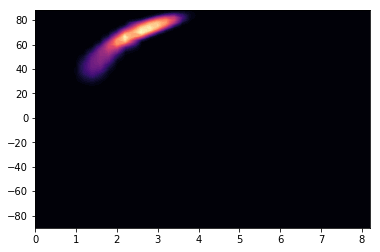

In [173]:
cpdf = a.pdf*cc 
cpdf = cpdf / np.sum(cpdf)
plt.contourf(*a._grid(), cpdf, 50, cmap='magma')
plt.show()

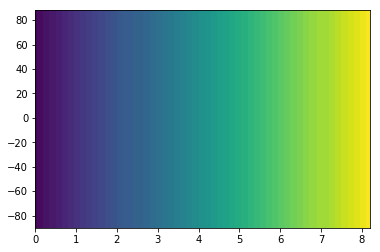

In [169]:
plt.contourf(*a._grid(), cc, 71)
plt.show()

In [ ]:
cpdf - a.pdf